In [36]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [37]:
data = pd.read_csv('datasets/spam7.csv')
# del data["Unnamed: 0"]
data.replace({'yesno': {'n': 0, 'y': 1}}, inplace=True)
y = data['yesno']
X = data.loc[:, 'crl.tot':'make']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
clf = DecisionTreeClassifier(min_impurity_decrease=0.001)
clf.fit(X_train, y_train)
print('train score: {}'.format(clf.score(X_train, y_train)))
print('test score: {}'.format(clf.score(X_test, y_test)))

train score: 0.8855072463768116
test score: 0.8679409209383145


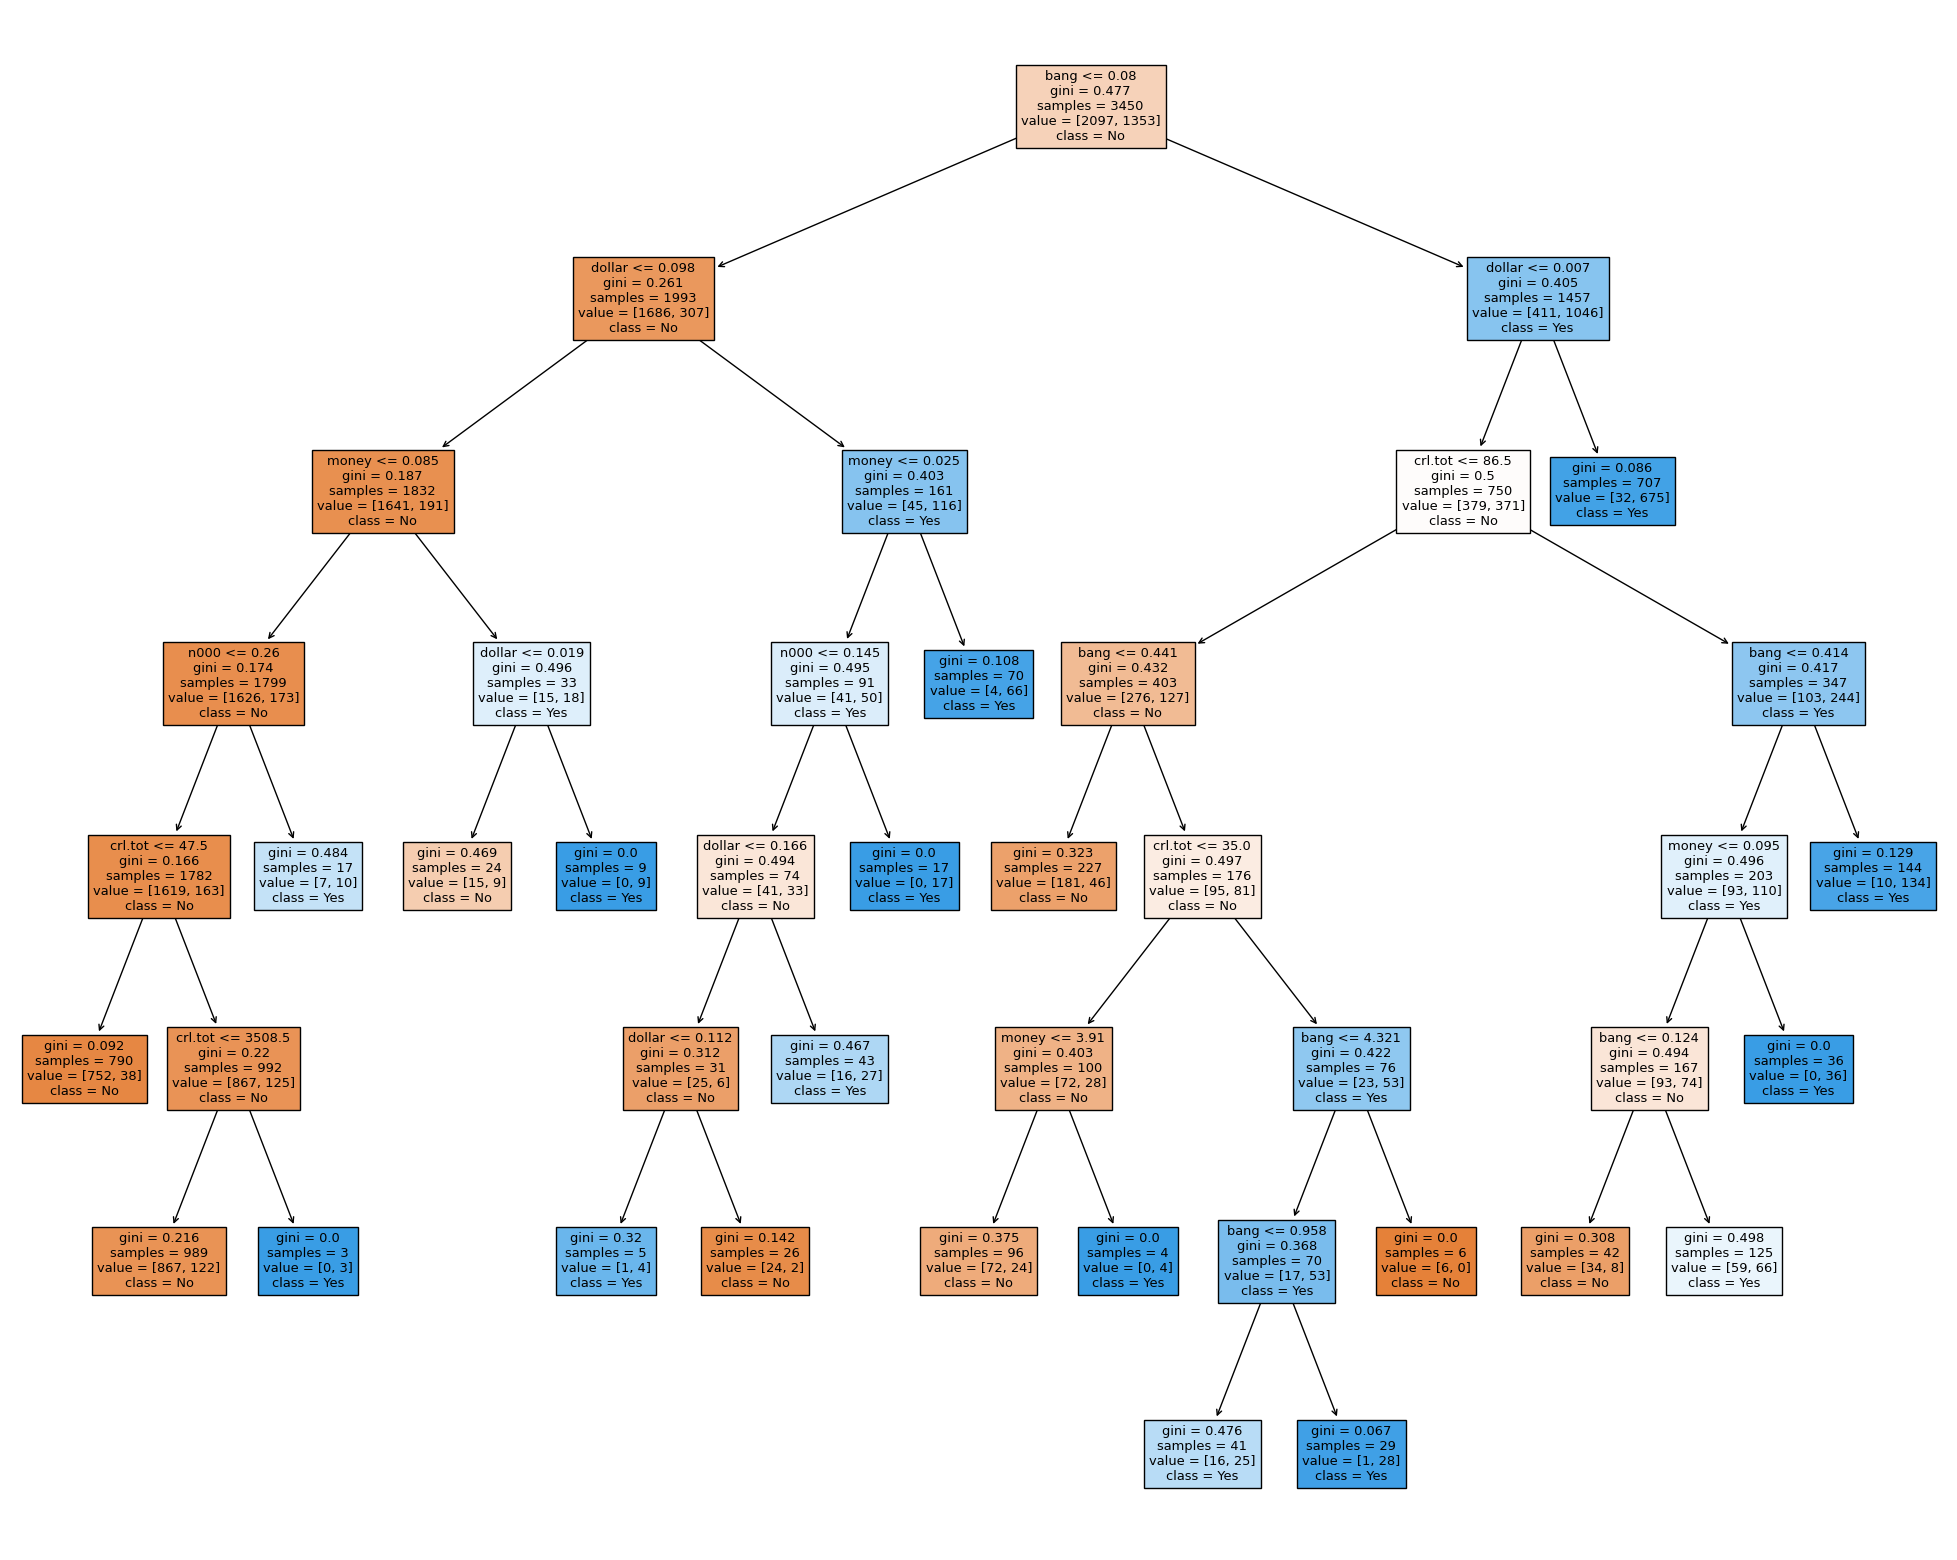

In [39]:
# Отображение дерева
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
feature_names=X.columns,
class_names=['No', 'Yes'],
filled=True)
fig.savefig('graphs/spam7.pdf', dpi=1000)

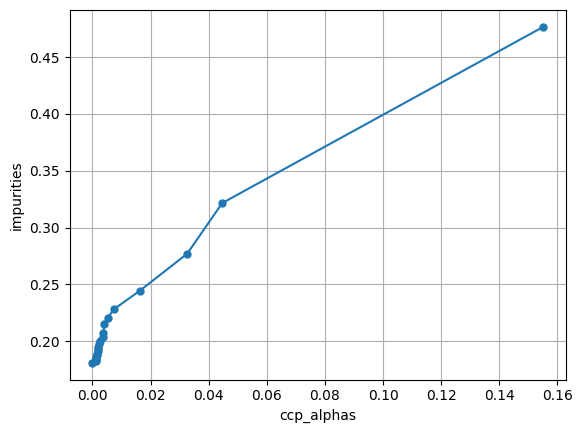

In [40]:
# alphas
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')
ccpp = clf.cost_complexity_pruning_path(X_train, y_train)
plt.plot(ccpp['ccp_alphas'], ccpp['impurities'], label='test',
marker='.', markersize=10)
plt.grid()
plt.show()

In [32]:
# dependence depth on alphas
# Число испытаний для одного значения
test_count = 10
depth_dep_train = Series(index=ccpp['ccp_alphas'], dtype=float)
for alpha in ccpp['ccp_alphas']:
    mean_depth_train = 0.
    for _ in np.arange(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
        clf = DecisionTreeClassifier(ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        mean_depth_train += clf.get_depth() / test_count
    depth_dep_train[alpha] = int(mean_depth_train)

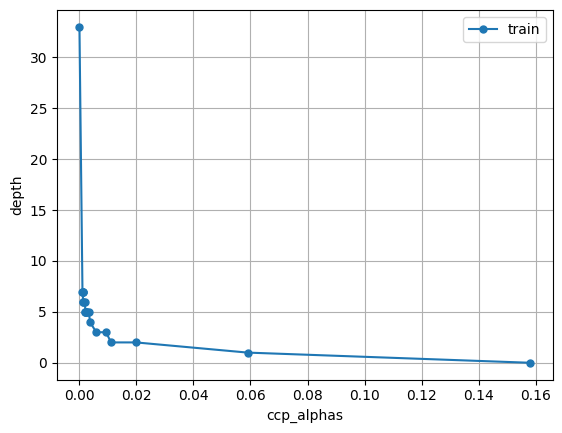

In [33]:
# Визуализация
plt.xlabel('ccp_alphas')
plt.ylabel('depth')
plt.plot(depth_dep_train, label='train', marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

In [34]:
# dependence accuracy on alphas
accuracy_dep_train = Series(index=ccpp['ccp_alphas'], dtype=float)
accuracy_dep_test = Series(index=ccpp['ccp_alphas'], dtype=float)
for alpha in ccpp['ccp_alphas']:
    mean_accuracy_train = 0.
    mean_accuracy_test = 0.
    for _ in np.arange(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
        clf = DecisionTreeClassifier(ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        mean_accuracy_train += clf.score(X_train, y_train) / test_count
        mean_accuracy_test += clf.score(X_test, y_test) / test_count
    accuracy_dep_train[alpha] = mean_accuracy_train
    accuracy_dep_test[alpha] = mean_accuracy_test

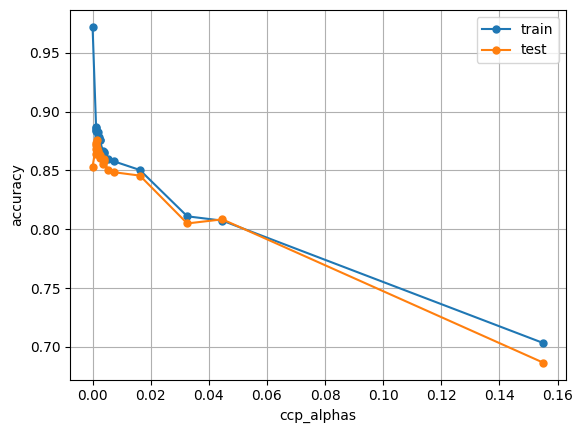

In [28]:
# Визуализация
plt.xlabel('ccp_alphas')
plt.ylabel('accuracy')
plt.plot(accuracy_dep_train, label='train', marker='.', markersize=10)
plt.plot(accuracy_dep_test, label='test', marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

In [41]:
# Запуск с оптимальными параметрами
clf_impurity = DecisionTreeClassifier(ccp_alpha=0.005, min_impurity_decrease=0.001)
clf_impurity.fit(X_train, y_train)
print('train score: {}'.format(clf_impurity.score(X_train, y_train)))
print('test score: {}'.format(clf_impurity.score(X_test, y_test)))

train score: 0.861159420289855
test score: 0.8479582971329279


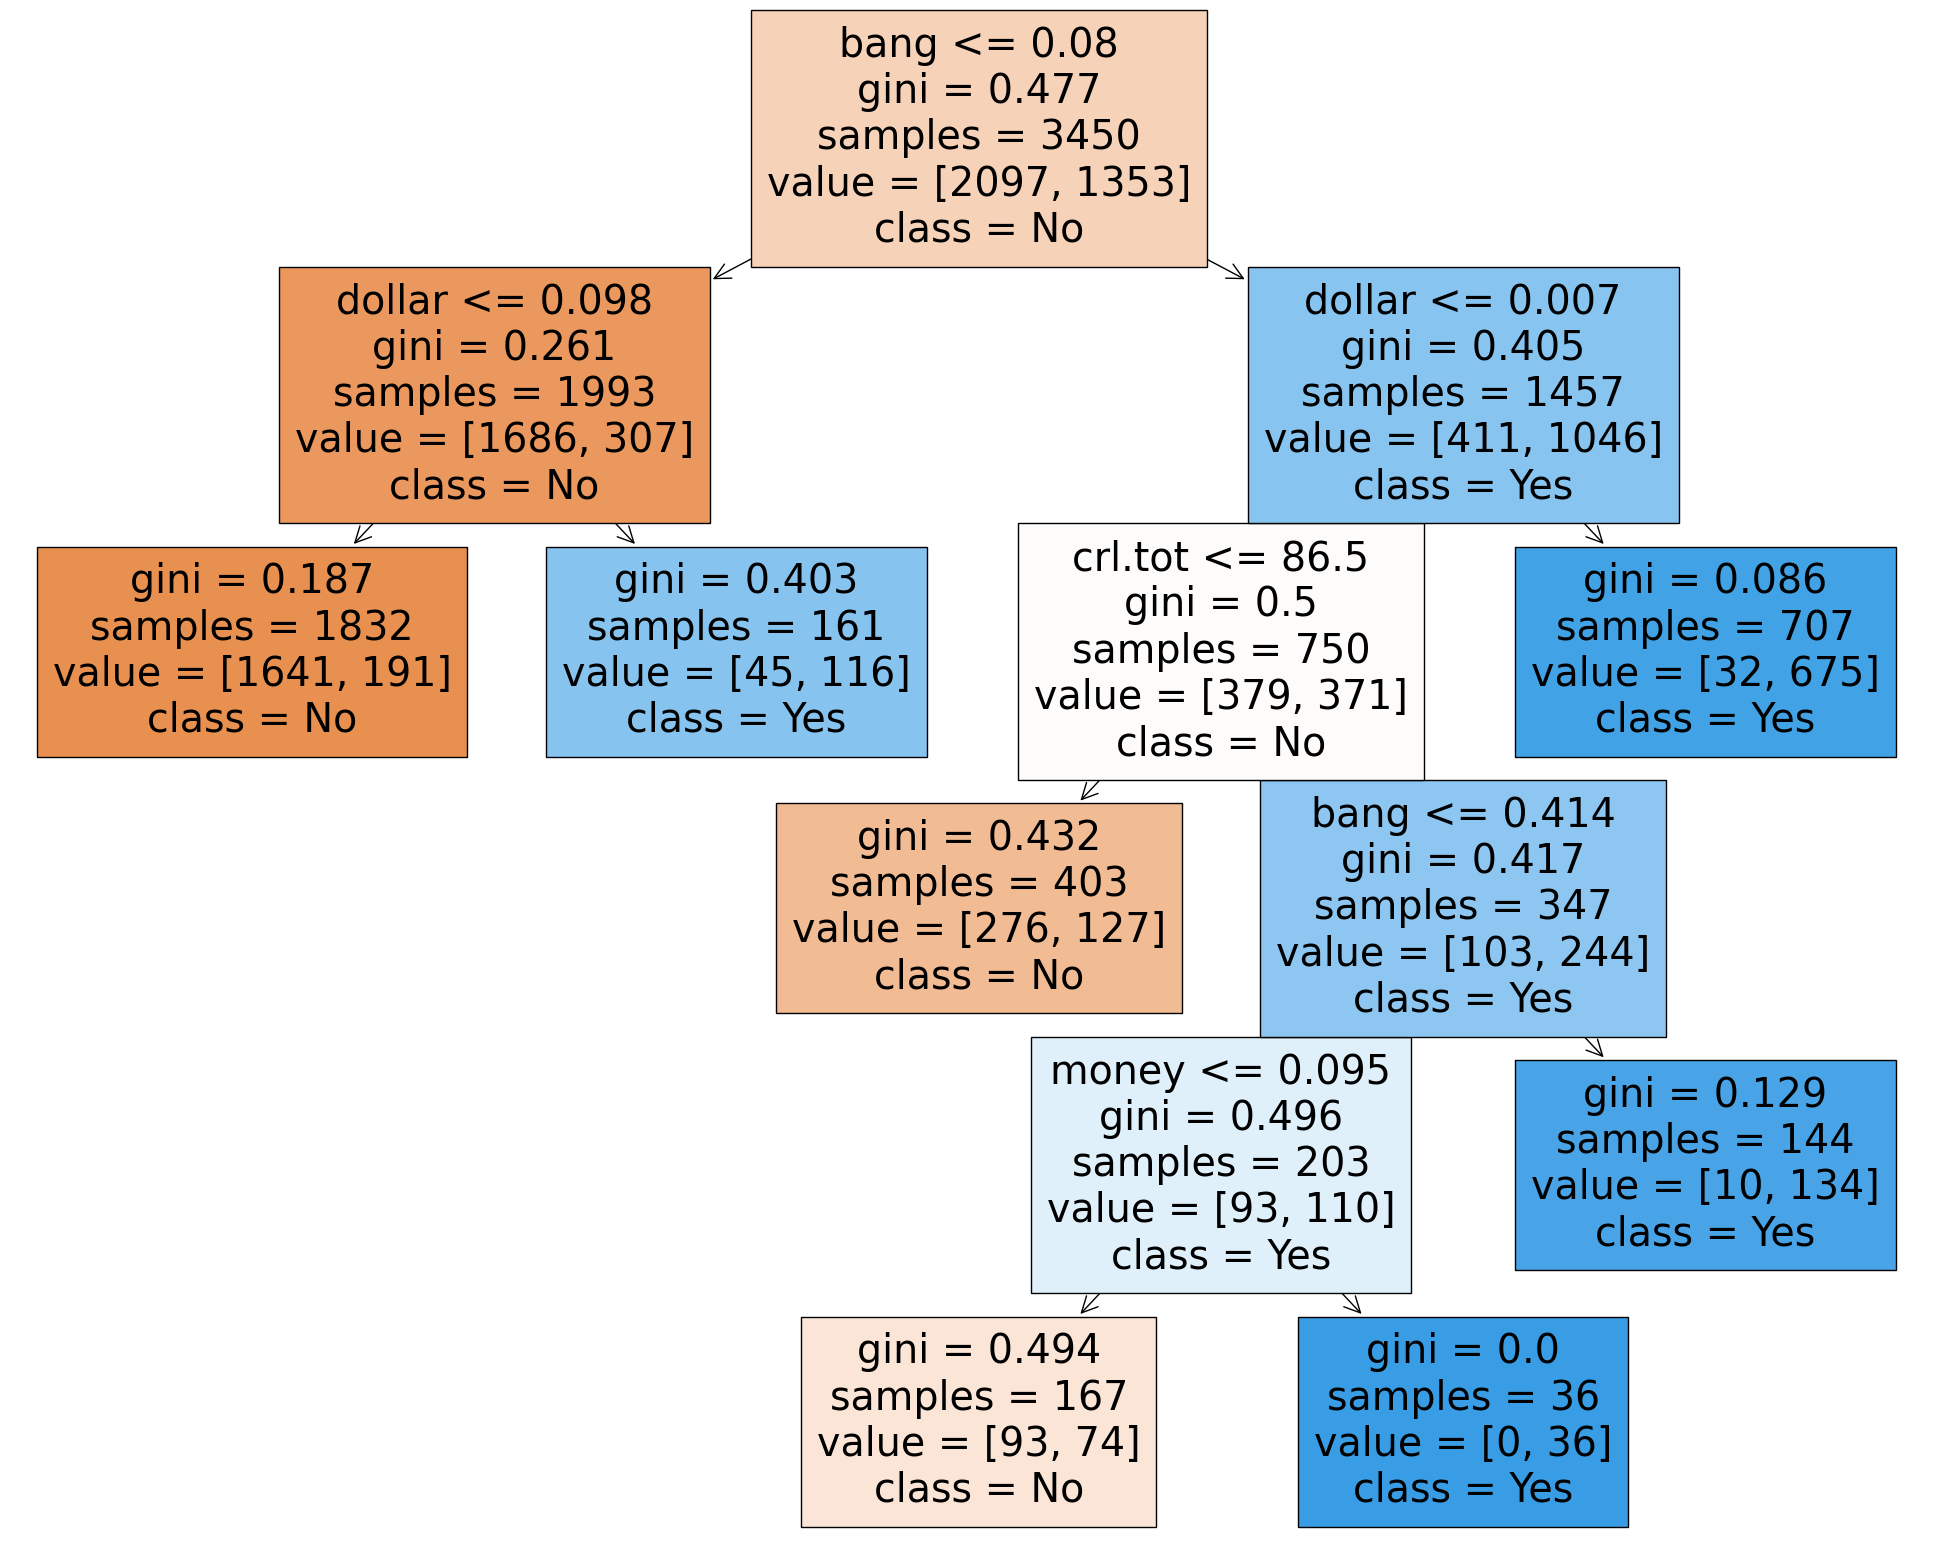

In [42]:
# Отображение дерева
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf_impurity,
feature_names=X.columns,
class_names=['No', 'Yes'],
filled=True)
fig.savefig('graphs/spam7_improved.pdf', dpi=1000)